In [1]:
import os
import pandas as pd
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# easier to see full text with a bigger maxwidth:
pd.options.display.max_colwidth = 200

list_of_dfs = []

try: 
    print('Lets try and pull data from the files in this folder')
    for file in os.listdir('../data')[1:]:
        d = pd.read_csv('../data/' + file)
        list_of_dfs.append(d)
    print('Huzzah! Mission Complete')
except:
    print("Welp, that didn't work")

df = pd.concat(list_of_dfs, ignore_index=True).g6y
df.shape

Lets try and pull data from the files in this folder
Huzzah! Mission Complete


C:\Users\kwama\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


(2119, 104)

In [3]:
df.columns

Index(['all_awardings', 'allow_live_comments', 'approved_at_utc',
       'approved_by', 'archived', 'author', 'author_cakeday',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext',
       ...
       'thumbnail_width', 'title', 'total_awards_received', 'ups', 'url',
       'user_reports', 'view_count', 'visited', 'whitelist_status', 'wls'],
      dtype='object', length=104)

In [4]:
df.head()

,all_awardings,allow_live_comments,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,...,thumbnail_width,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],False,NaN,NaN,False,pittman66,NaN,NaN,MAL,[],...,NaN,"Wiki Overhaul Month, Week 2: Watch Order Wiki",0,67,https://www.reddit.com/r/anime/comments/c822ra/wiki_overhaul_month_week_2_watch_order_wiki/,[],NaN,False,all_ads,6
1,[],False,NaN,NaN,False,AnimeMod,NaN,NaN,NaN,[],...,NaN,"Recommendation Tuesdays Megathread - Week of July 02, 2019",0,61,https://www.reddit.com/r/anime/comments/c823rj/recommendation_tuesdays_megathread_week_of_july/,[],NaN,False,all_ads,6
2,[],True,NaN,NaN,False,MinecrafterPH,NaN,#2e51a2,MAL,[],...,NaN,My Hero Academia Season 4 is reportedly listed for 25 episodes,0,5778,https://www.reddit.com/r/anime/comments/c8o432/my_hero_academia_season_4_is_reportedly_listed/,[],NaN,False,all_ads,6
3,[],True,NaN,NaN,False,AutoLovepon,NaN,NaN,NaN,[],...,NaN,Dumbbell Nan Kilo Moteru? - Episode 1 discussion,0,1091,https://www.reddit.com/r/anime/comments/c8osvp/dumbbell_nan_kilo_moteru_episode_1_discussion/,[],NaN,False,all_ads,6
4,[],False,NaN,NaN,False,ShaKing807,NaN,#2e51a2,MAL,[],...,NaN,Best Girl 6: Starting Salt in Another Contest! Round 5 Bracket C!,0,279,https://www.reddit.com/r/anime/comments/c8u89t/best_girl_6_starting_salt_in_another_contest/,[],NaN,False,all_ads,6


In [5]:
df['subreddit'].value_counts()

anime     1619
KDRAMA     500
Name: subreddit, dtype: int64

>The unbalanced classes may pose a problem for my model because it may struggle with assigning new data to the kdrama class. 

In [6]:
df = df[['subreddit', 'selftext']]
df.head()

,subreddit,selftext
0,anime,"Hi everyone, welcome to the Wiki Overhaul Month! The mod team along with a select few users are looking to improve our [Wiki](https://www.reddit.com/r/anime/wiki) as it has outdated information, o..."
1,anime,"\nNeed a recommendation or have one to share? This is your thread! This thread is active all week, so you can post in it when it's not Tuesday and still get an answer! :)\n\nIf you have a recommen..."
2,anime,"According to [this post](https://i.imgur.com/bQIt4oL.jpg) on the AnimeTV YouTube channel, MHA S4 is listed for 25 episodes.\n\nHowever, no official confirmation was given."
3,anime,"*Dumbbell Nan Kilo Moteru?*, episode 1\n\nAlternative names: *Danberu Nan Kiro Moteru?, How Heavy Are the Dumbbells You Lift?*\n\n# [Rate this episode here.](https://youpoll.me/15869/)\n\n**Remind..."
4,anime,###[Vote here](https://animebracket.com/vote/best-girl-6-starting-salt-in-another-contest/)\n\n###[Results here](https://animebracket.com/results/best-girl-6-starting-salt-in-another-contest?group...


In [7]:
df.isnull().sum().sum()

1

I'm going to drop the NaN value because it is most likely a meme/gif and I doubt that it can't be used for a similar post in either subreddit.

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum().sum()

0

### Making post text and titles lists for Sentiment Analysis

In [10]:
subreddit_text = list(df['selftext'])

***
# Sentiment Analysis

In [11]:
#Instantiate Sentiment Intensity Analyszer
sia = SentimentIntensityAnalyzer()

The Sentiment Intensity Analyzer(sia) accepts a string and returns a dictionary of scores on the positivity, negativity, neutrality, and total sentiment attached with that string. 
> * The sum of neg, pos, and neu scores adds to 1
* neg, pos, and neu scores are on a 0 - 1 scale
* The compound score is on a -1 to 1 scale, where higher negative number are associated with high negativity

This analyzer has been tested on social media data, so it is adept at handling reddit posts, twitterings (or whatever they're called), etc. Some examples are below

In [12]:
print(subreddit_text[0])

Hi everyone, welcome to the Wiki Overhaul Month! The mod team along with a select few users are looking to improve our [Wiki](https://www.reddit.com/r/anime/wiki) as it has outdated information, organized poorly, or just needs a face lift. Each week we will be hitting major parts of the wiki. The current schedule is as follows:

######Week 1 : What needs fixed, organization, and general suggestions

######Week 2 (This week): [Watch Order Wiki](https://www.reddit.com/r/anime/w/watch_order)

######Week 3: [FAQ](https://www.reddit.com/r/anime/w/faaq)

######Week 4: Smaller Wiki Pages (Legal Streams, Anime-Related Subs, /r/anime sings, album releases, AMAs, surveys, etc.)

######Week 5 &amp; 6: [Recommendations](https://www.reddit.com/r/anime/w/recommendations)

######Week 7: Any other page that needs major attention (Maybe Rewatch/Airing Discussion, if not, this week will be ignored)

So as mentioned above, this week we are looking at:

#[Watch Order Wiki](https://www.reddit.com/r/anime/w

In [13]:
sia.polarity_scores(subreddit_text[0])

{'neg': 0.012, 'neu': 0.943, 'pos': 0.045, 'compound': 0.7758}

Here we can see the sia at work. This reddit post has a lot of neutral words, but the words with sentiment attached to them have significantly higher positive connotation associated to them than negative- hence the positive compound score. 

In [14]:
posts = [sia.polarity_scores(each) for each in subreddit_text]

In [15]:
posts_df = pd.DataFrame(posts)

posts_df.head()

,compound,neg,neu,pos
0,0.7758,0.012,0.943,0.045
1,0.9772,0.007,0.815,0.178
2,-0.2960,0.095,0.905,0.000
3,-0.4314,0.102,0.813,0.086
4,0.8463,0.000,0.587,0.413


In [16]:
sentiment_df = pd.concat([posts_df, df.reset_index(drop = True)], axis = 1)
sentiment_df['subreddit'] = sentiment_df['subreddit'].map({'anime':'Anime',
                             'KDRAMA':'KDrama'})
sentiment_df.head()

,compound,neg,neu,pos,subreddit,selftext
0,0.7758,0.012,0.943,0.045,Anime,"Hi everyone, welcome to the Wiki Overhaul Month! The mod team along with a select few users are looking to improve our [Wiki](https://www.reddit.com/r/anime/wiki) as it has outdated information, o..."
1,0.9772,0.007,0.815,0.178,Anime,"\nNeed a recommendation or have one to share? This is your thread! This thread is active all week, so you can post in it when it's not Tuesday and still get an answer! :)\n\nIf you have a recommen..."
2,-0.2960,0.095,0.905,0.000,Anime,"According to [this post](https://i.imgur.com/bQIt4oL.jpg) on the AnimeTV YouTube channel, MHA S4 is listed for 25 episodes.\n\nHowever, no official confirmation was given."
3,-0.4314,0.102,0.813,0.086,Anime,"*Dumbbell Nan Kilo Moteru?*, episode 1\n\nAlternative names: *Danberu Nan Kiro Moteru?, How Heavy Are the Dumbbells You Lift?*\n\n# [Rate this episode here.](https://youpoll.me/15869/)\n\n**Remind..."
4,0.8463,0.000,0.587,0.413,Anime,###[Vote here](https://animebracket.com/vote/best-girl-6-starting-salt-in-another-contest/)\n\n###[Results here](https://animebracket.com/results/best-girl-6-starting-salt-in-another-contest?group...


In [17]:
sentiment_df.describe()

,compound,neg,neu,pos
count,2118.000000,2118.000000,2118.000000,2118.000000
mean,0.352040,0.065969,0.797439,0.136594
std,0.607322,0.070894,0.111759,0.097982
min,-0.999600,0.000000,0.248000,0.000000
25%,-0.009675,0.000000,0.729000,0.072000
50%,0.556200,0.052000,0.802000,0.124000
75%,0.895500,0.099000,0.869000,0.189000
max,1.000000,0.457000,1.000000,0.706000


Above we can see the general spread of the scores for both anime and kdrama subreddits. Some takeaways are:
> * Our average compound score is $0.361$, which tells me that people tend to post positively about animes and kdramas. 
* We have a max and min compound score of $1$ and $-1$ respectively, letting me know that there are some posts that are entirely positive and negative.
* At least $75 \%$ of my posts have a neutral score of at least $.735$, which tells me that people are either busy building to what they want to say, or aren't too opinionated. I'm going to go out on a limb and say it's the former. 

### Highest Scoring Negative and Positive Posts

> * Anime has the $4$ most negative comound posts and KDrama has the $4$ most positive compound posts
* Anime has the top $4$ most positive posts and the top 5 most negative posts

* Most Negative Compound Scoring Posts

In [18]:
sentiment_df.sort_values(by = 'compound', ascending = True).head()

,compound,neg,neu,pos,subreddit,selftext
206,-0.9996,0.207,0.698,0.095,Anime,"I realise this is a little late, but I just watched the dub version of Erwin's iconic speech in Episode 53. This scene was my favourite scene in the story, and probably my favourite scene out of e..."
992,-0.9993,0.178,0.692,0.129,Anime,"Some people are probably familiar with this but No Game No Life is one of my most hated anime of all time. However, I think what’s interesting about this is why I think this is such an awful serie..."
327,-0.9987,0.170,0.735,0.095,Anime,Did anyone else not enjoy Saga of Tanya the evil. For me it was a story of a stupid aethiest who refused to take a critical look at their own flawed world view in the face of literally God. It mak...
805,-0.9982,0.141,0.751,0.108,Anime,Re: Zero - Starting Life In Another World is one of the most popular anime of the current generation. It’s gained a massive following regarding it being about the main protagonist who goes on this...
2075,-0.9979,0.233,0.644,0.123,KDrama,"I've just finished watching Empress Ki this morning and my feeling for it hasn't over yet.\n\nAs searching for others' comments about this series, I see a lot of people hate and even despise the c..."


* Most Positive Compount Scoring Posts

In [19]:
sentiment_df.sort_values(by = 'compound', ascending = False).head()

,compound,neg,neu,pos,subreddit,selftext
1725,1.0000,0.075,0.764,0.162,KDrama,**Links to the other parts of the series:**\n\n[Part 1](https://www.reddit.com/r/KDRAMA/comments/c12lyy/the_kdramas_of_the_first_half_of_2019_a_review/) **I** [Part 3](https://www.reddit.com/r/KDR...
1679,1.0000,0.074,0.754,0.172,KDrama,**Links to the other parts of the series:**\n\n[Part 1 ](https://www.reddit.com/r/KDRAMA/comments/c12lyy/the_kdramas_of_the_first_half_of_2019_a_review/)**I** [Part 2](https://www.reddit.com/r/KDR...
1693,0.9999,0.096,0.668,0.236,KDrama,I started watching Korean drama earlier this year and I wanted to write a little bit about my experience with it! First off - a bit of background. I’m a Scottish woman in my late twenties. I’m not...
1706,0.9999,0.077,0.773,0.150,KDrama,**Links to the other parts of the series:**\n\n[Part 1 ](https://www.reddit.com/r/KDRAMA/comments/c12lyy/the_kdramas_of_the_first_half_of_2019_a_review/)**I** [Part 2](https://www.reddit.com/r/KDR...
1530,0.9999,0.078,0.729,0.193,Anime,# Episode 07 World-Level Ability\n\n[Previous Episode](https://www.reddit.com/r/anime/comments/ca4ux9/gundam_build_fighters_rewatch_episode_6_discussion/) | [Next Episode](https://www.reddit.com/r...


* Most Positive Posts

In [20]:
sentiment_df.sort_values(by = 'pos', ascending = False).head()

,compound,neg,neu,pos,subreddit,selftext
733,0.8997,0.0,0.294,0.706,Anime,I need some romance anime’s to watch!! Please help lol
486,0.7351,0.0,0.326,0.674,Anime,Just asking for a friend :)
408,0.5719,0.0,0.390,0.610,Anime,A YouTuber recommended I don’t if good
128,0.4019,0.0,0.426,0.574,Anime,Or promising I guess.
1932,0.9062,0.0,0.469,0.531,KDrama,For me its my love from another star and romance is a bonus book


* Most Negative Posts

In [21]:
sentiment_df.sort_values(by = 'neg', ascending = False).head()

,compound,neg,neu,pos,subreddit,selftext
932,-0.8402,0.457,0.435,0.109,Anime,"Multiple reasons are possible: Like being annoying, being disgusting, being evil and so on"
711,-0.6696,0.428,0.572,0.000,Anime,For what reason is He/she so bad ?
104,-0.6249,0.406,0.594,0.000,Anime,Anime with the worst fanbase and why
916,-0.8636,0.389,0.452,0.159,Anime,For me AKAME GA KILL and Happy Sugar Life made me angry and depressed. What are your depressing anime please don't spoil anything.
1199,-0.3400,0.386,0.351,0.263,Anime,just name your favorite anime villains


***
### Figures

In [22]:
sentiment_df['subreddit'].value_counts()

Anime     1618
KDrama     500
Name: subreddit, dtype: int64

* Average Compound Score by Subreddit

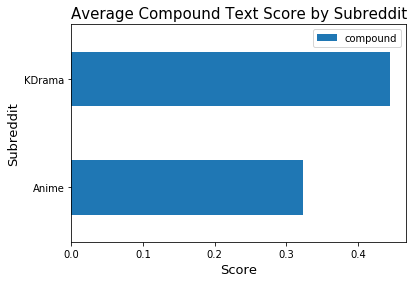

In [23]:
sentiment_df.groupby('subreddit').mean()[['compound']].plot(kind = 'barh')
plt.title('Average Compound Text Score by Subreddit', fontsize = 15);
plt.xlabel('Score', fontsize = 13)
plt.ylabel('Subreddit', fontsize = 13);

>From this figure it's clear that KDrama posts tend to have more positive sentiment that Anime posts. 

***
* Average Positive and Negative Score by Subreddit

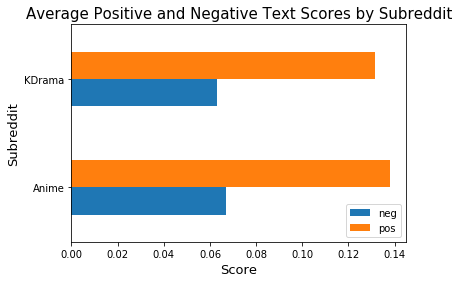

In [24]:
sentiment_df.groupby('subreddit').mean()[['neg', 'pos']].plot(kind = 'barh')
plt.title('Average Positive and Negative Text Scores by Subreddit', fontsize = 15)
plt.ylabel('Subreddit', fontsize = 13)
plt.xlabel('Score', fontsize = 13);

> This figure makes it very clear that on average, positive posts were significantly more positive than negative posts were negatives for both subreddits.

***
* Distribution of Compound Scores by Subreddit

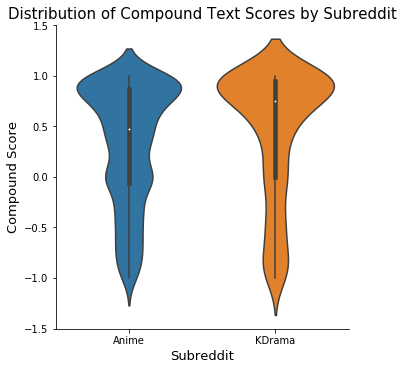

In [25]:
sns.catplot(y = 'compound',
            x = 'subreddit',
            data = sentiment_df, 
            kind = 'violin')
plt.title('Distribution of Compound Text Scores by Subreddit', fontsize = 15)
plt.xlabel('Subreddit',fontsize = 13)
plt.ylabel('Compound Score', fontsize = 13);

> This figure shows that both posts have more positive than negative posts. 
It also shows that there are more neutral anime posts that KDrama posts. 

In [26]:
cv = CountVectorizer(stop_words = 'english', max_df=.9)
tf = TfidfVectorizer(stop_words = 'english', max_df=.9)

In [27]:
#Fit dataframe to corpus
cv.fit(sentiment_df['selftext'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [28]:
# fir tfidf vectorizer to corpus
tf.fit(sentiment_df['selftext'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [29]:
#trasform text
text_words_cv = cv.transform(sentiment_df['selftext'])

In [30]:
# Convert text into a DataFrame
text_df_cv = pd.DataFrame(text_words_cv.toarray(),
                         columns = cv.get_feature_names())

text_df_cv.head()

,00,000,0000380361,00021,001,0051,00518,0079,0080,0083,...,ｇｇｏ,ｋｎｏｗ,ｓａｏ,ｔｈｅ,ｖｉｂｅｓ,ﾟヮﾟ,𝐂𝐎𝐍𝐓𝐄𝐍𝐓,𝐋𝐄𝐀𝐃𝐄𝐑,𝐓𝐑𝐄𝐍𝐃,𝐭𝐯𝐍
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
top_10_cv =text_df_cv.sum().sort_values(ascending = False).head(10)

* Top 10 CountVectorized Words

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

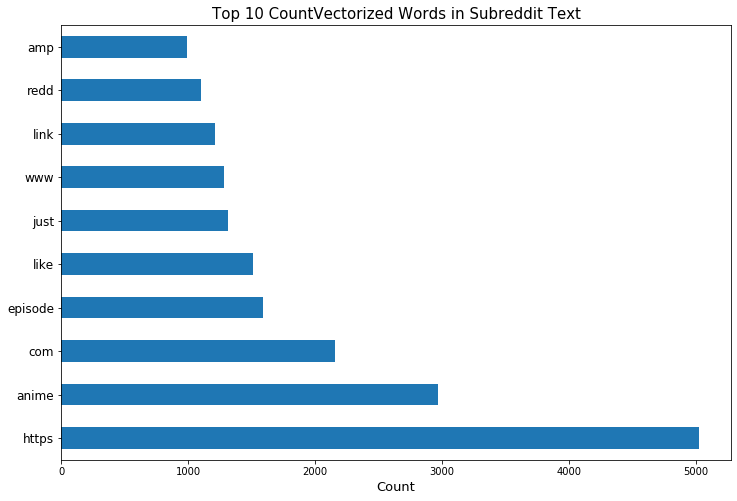

In [39]:
plt.figure(figsize=(12,8))
top_10_cv.plot(kind = 'barh')

plt.title('Top 10 CountVectorized Words in Subreddit Text', fontsize = 15)
plt.xlabel('Count', fontsize = 13);
plt.yticks(fontsize = 12)

In [33]:
#trasform text
text_words_tf = tf.transform(sentiment_df['selftext'])

In [34]:
# Convert text into a DataFrame
text_df_tf = pd.DataFrame(text_words_tf.toarray(),
                         columns = tf.get_feature_names())

text_df_tf.head()

,00,000,0000380361,00021,001,0051,00518,0079,0080,0083,...,ｇｇｏ,ｋｎｏｗ,ｓａｏ,ｔｈｅ,ｖｉｂｅｓ,ﾟヮﾟ,𝐂𝐎𝐍𝐓𝐄𝐍𝐓,𝐋𝐄𝐀𝐃𝐄𝐑,𝐓𝐑𝐄𝐍𝐃,𝐭𝐯𝐍
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#Sorting columns of tfidfvectorized words 
text_df_tf.sum().sort_values(ascending = False)
top_10_tf = text_df_tf.sum().sort_values(ascending = False).head(10)

* Top 10 TFIDFVectorized Words

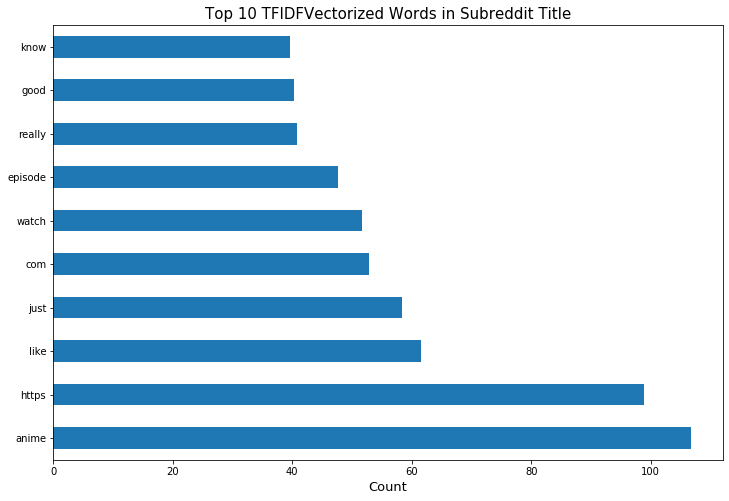

In [43]:
plt.figure(figsize=(12,8))
top_10_tf.plot(kind = 'barh')
plt.title('Top 10 TFIDFVectorized Words in Subreddit Title', fontsize = 15)
plt.xlabel('Score, fontsize = 13);